In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from model import createDeepLabv3

In [7]:
# Load the trained model 
checkpoint = torch.load('C:\\Users\\nbhas\Desktop\\Shishir\\DeepLabv3FineTuning\\CFExp\\epoch-complete-12.pth')
# model = MyModel() 
model = createDeepLabv3()
if torch.cuda.is_available():
    model.cuda()
model.load_state_dict(checkpoint['state_dict'])
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
# # Read the log file using pandas into a dataframe
# df = pd.read_csv('./CFExp/log.csv')
# # Plot all the values with respect to the epochs
# df.plot(x='epoch',figsize=(15,8));
# print(df[['Train_auroc','Test_auroc']].max())

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

### Sample Prediction

In [8]:
ino = 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Read  a sample image and mask from the data-set
img = cv2.imread(f'C:\\Users\\nbhas\\Desktop\Shishir\DeepLabv3FineTuning\CrackForest\Images\\img-57quad-4.png').transpose(2,0,1).reshape(1,3,500,500)
# print(img)
mask = cv2.imread(f'C:\\Users\\nbhas\\Desktop\\Shishir\\DeepLabv3FineTuning\\CrackForest\\Masks\\img-57quad-4.png',0)
# mask = cv2.resize(mask, (500,500))
# img = img.to(device)
# mask = mask.to(device)

with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)


(array([1.82000e+02, 1.06970e+04, 1.60491e+05, 2.43470e+04, 1.65700e+04,
        1.74990e+04, 1.15680e+04, 6.35100e+03, 2.13700e+03, 1.58000e+02]),
 array([-0.32265764, -0.19949839, -0.07633914,  0.04682012,  0.16997936,
         0.29313862,  0.41629788,  0.53945714,  0.6626164 ,  0.78577566,
         0.9089349 ], dtype=float32),
 <BarContainer object of 10 artists>)

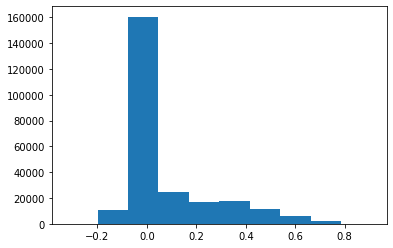

In [9]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

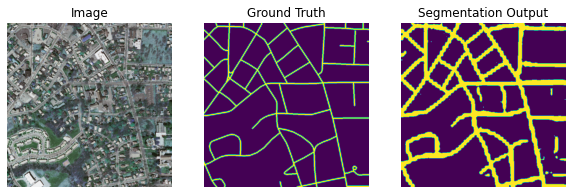

In [10]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.1);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./SegmentationOutput.png',bbox_inches='tight')

In [4]:
loss_df = pd.read_csv('C:\\Users\\nbhas\\Desktop\\Shishir\\loss.csv')

(array([ 84., 703.,  14.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([1.48148148e-07, 7.07339644e-06, 1.39986447e-05, 2.09238930e-05,
        2.78491413e-05, 3.47743896e-05, 4.16996379e-05, 4.86248862e-05,
        5.55501345e-05, 6.24753827e-05, 6.94006310e-05]),
 <BarContainer object of 10 artists>)

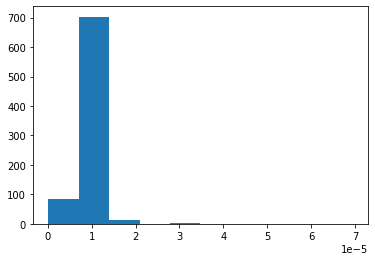

In [9]:
plt.hist(loss_df['ratio'])